<a href="https://colab.research.google.com/github/alexsgith/Alcohol_Studies/blob/main/Alcohol_Studies.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
#0. Read Data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
data = pd.read_csv("Alcohol_Studies.csv")
print(data)

    school sex  age address famsize Pstatus  Medu  Fedu      Mjob      Fjob  \
0       GP   F   18       U     GT3       A     4     4   at_home   teacher   
1       GP   F   17       U     GT3       T     1     1   at_home     other   
2       GP   F   15       U     LE3       T     1     1   at_home     other   
3       GP   F   15       U     GT3       T     4     2    health  services   
4       GP   F   16       U     GT3       T     3     3     other     other   
..     ...  ..  ...     ...     ...     ...   ...   ...       ...       ...   
644     MS   F   19       R     GT3       T     2     3  services     other   
645     MS   F   18       U     LE3       T     3     1   teacher  services   
646     MS   F   18       U     GT3       T     1     1     other     other   
647     MS   M   17       U     LE3       T     3     1  services  services   
648     MS   M   18       R     LE3       T     3     2  services     other   

     ... famrel freetime  goout  Dalc  Walc health 

In [13]:
#1. PreProcessing or Data Cleaning
to_drop = ['famsize','nursery','higher', 'internet', 'romantic','traveltime','reason']
data.drop(to_drop, inplace=True, axis=1)
print(data)

    school sex  age address Pstatus  Medu  Fedu      Mjob      Fjob guardian  \
0       GP   F   18       U       A     4     4   at_home   teacher   mother   
1       GP   F   17       U       T     1     1   at_home     other   father   
2       GP   F   15       U       T     1     1   at_home     other   mother   
3       GP   F   15       U       T     4     2    health  services   mother   
4       GP   F   16       U       T     3     3     other     other   father   
..     ...  ..  ...     ...     ...   ...   ...       ...       ...      ...   
644     MS   F   19       R       T     2     3  services     other   mother   
645     MS   F   18       U       T     3     1   teacher  services   mother   
646     MS   F   18       U       T     1     1     other     other   mother   
647     MS   M   17       U       T     3     1  services  services   mother   
648     MS   M   18       R       T     3     2  services     other   mother   

     ...  famrel  freetime goout Dalc W

In [15]:
feature_cols=['age','Medu','Fedu','studytime','failures','famrel','freetime','goout','Dalc','Walc','health','absences']
x=data[feature_cols] 
data['GMean']=data.G1+data.G2+data.G3
y=data['GMean'] #target variable
print(x)
print(y)


     age  Medu  Fedu  studytime  failures  famrel  freetime  goout  Dalc  \
0     18     4     4          2         0       4         3      4     1   
1     17     1     1          2         0       5         3      3     1   
2     15     1     1          2         0       4         3      2     2   
3     15     4     2          3         0       3         2      2     1   
4     16     3     3          2         0       4         3      2     1   
..   ...   ...   ...        ...       ...     ...       ...    ...   ...   
644   19     2     3          3         1       5         4      2     1   
645   18     3     1          2         0       4         3      4     1   
646   18     1     1          2         0       1         1      1     1   
647   17     3     1          1         0       2         4      5     3   
648   18     3     2          1         0       4         4      1     3   

     Walc  health  absences  
0       1       3         4  
1       1       3         2

In [16]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.1,random_state=1)
print(x_train)
print(x_test)
print(y_train)
print(y_test)


     age  Medu  Fedu  studytime  failures  famrel  freetime  goout  Dalc  \
34    16     3     2          1         0       5         4      3     1   
345   18     4     4          2         0       4         2      4     1   
617   18     1     1          3         0       5         3      2     1   
444   16     3     4          2         0       3         4      5     1   
340   17     3     3          1         0       4         4      3     1   
..   ...   ...   ...        ...       ...     ...       ...    ...   ...   
144   16     1     1          1         0       3         3      3     1   
645   18     3     1          2         0       4         3      4     1   
72    15     1     1          2         0       3         3      4     2   
235   17     1     1          3         0       4         3      4     1   
37    16     4     4          3         0       2         4      3     1   

     Walc  health  absences  
34      1       5         4  
345     1       4         0

In [17]:
from sklearn.tree import DecisionTreeClassifier
clf= DecisionTreeClassifier(criterion="entropy", max_depth=3)
clf= clf.fit(x_train,y_train)


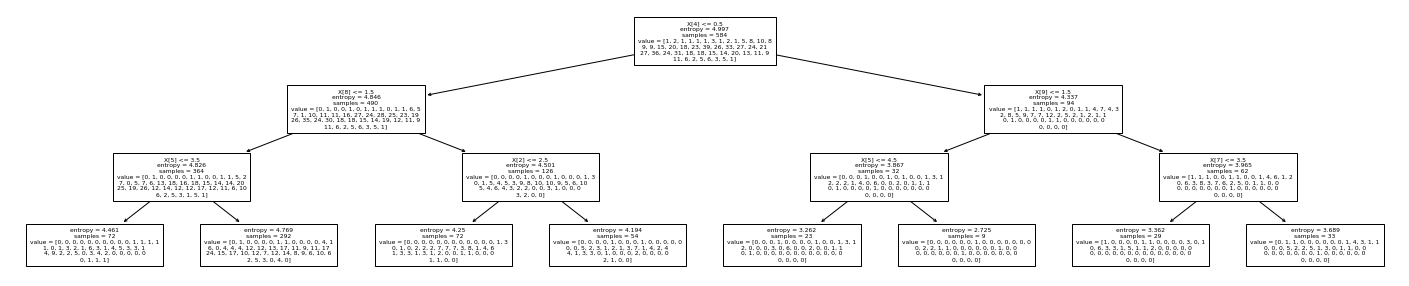

In [61]:
from sklearn import tree
fig = plt.figure(figsize=(25,5))
_ = tree.plot_tree(clf, fontsize=6)

In [62]:
y_pred=clf.predict(x_test)

In [63]:
from sklearn import metrics
acc=metrics.accuracy_score(y_test,y_pred)
print("Accuracy: ",acc*100)
print(metrics.classification_report(y_test, y_pred))

Accuracy:  4.615384615384616
              precision    recall  f1-score   support

           7       0.00      0.00      0.00         2
          15       0.00      0.00      0.00         1
          22       0.00      0.00      0.00         1
          25       0.00      0.00      0.00         3
          26       0.00      0.00      0.00         5
          27       0.00      0.00      0.00         0
          28       0.00      0.00      0.00         3
          29       0.00      0.00      0.00         3
          30       0.00      0.00      0.00         3
          31       0.00      0.00      0.00         3
          32       0.00      0.00      0.00         4
          33       0.08      0.25      0.12         4
          34       0.00      0.00      0.00         1
          35       0.00      0.00      0.00         2
          36       0.00      0.00      0.00         2
          37       0.05      0.50      0.08         2
          38       0.00      0.00      0.00         

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1

Text(0, 0.5, 'Grade')

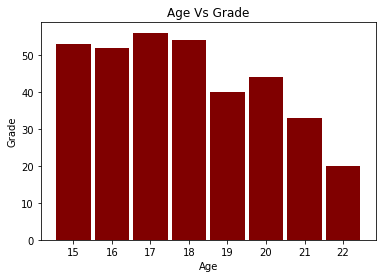

In [84]:
plt.bar(data.age, data.GMean, color ='maroon',width = 0.9)
plt.title("Age Vs Grade")
plt.xlabel("Age")
plt.ylabel("Grade")

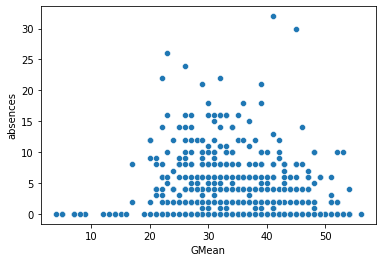

In [35]:
import seaborn as sns
sns.scatterplot(x=data["GMean"], y=data["absences"])

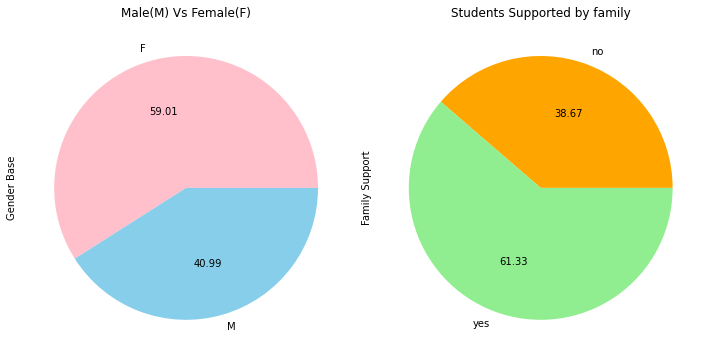

In [74]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10, 5))
data.groupby('sex').size().plot(kind='pie', autopct='%.2f',colors=['pink', 'skyblue'],ax=ax1)
data.groupby('famsup').size().plot(kind='pie', autopct='%.2f',colors=['orange', 'lightgreen'],ax=ax2)
ax1.set_ylabel('Gender Base')
ax1.set_title('Male(M) Vs Female(F)')
ax2.set_ylabel('Family Support')
ax2.set_title('Students Supported by family')
plt.tight_layout()